In [59]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [60]:
rating = pd.read_csv("/kaggle/input/anime-recommendation-database-2020/rating_complete.csv")

In [61]:
print(len(rating))

57633278


In [62]:
rating.head(3)

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7


In [63]:
print(len(rating['user_id'].unique()))
print(len(rating['anime_id'].unique()))

310059
16872


In [64]:
rating_count = rating['user_id'].value_counts()
rating_count.describe()

count    310059.000000
mean        185.878423
std         255.290522
min           1.000000
25%          43.000000
50%         113.000000
75%         238.000000
max       15455.000000
Name: count, dtype: float64

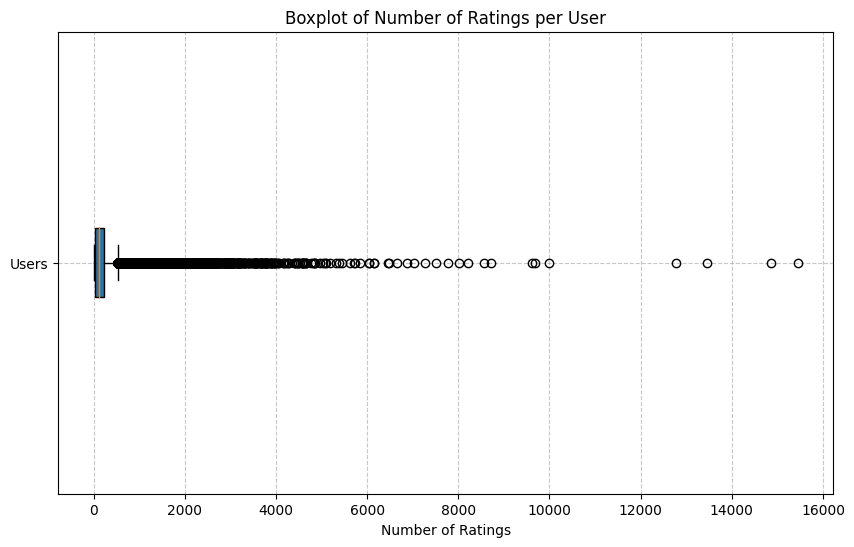

In [65]:
import matplotlib.pyplot as plt

# 각 사용자가 남긴 평가의 수를 집계
rating_count = rating['user_id'].value_counts()

# 박스플롯 그리기
plt.figure(figsize=(10, 6))
plt.boxplot(rating_count, vert=False, patch_artist=True)

# 그래프 제목과 레이블 설정
plt.title('Boxplot of Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.yticks([1], ['Users'])  # Y축 레이블 설정 (단일 박스이므로 'Users'로 설정)
plt.grid(True, linestyle='--', alpha=0.7)

# 그래프 출력
plt.show()

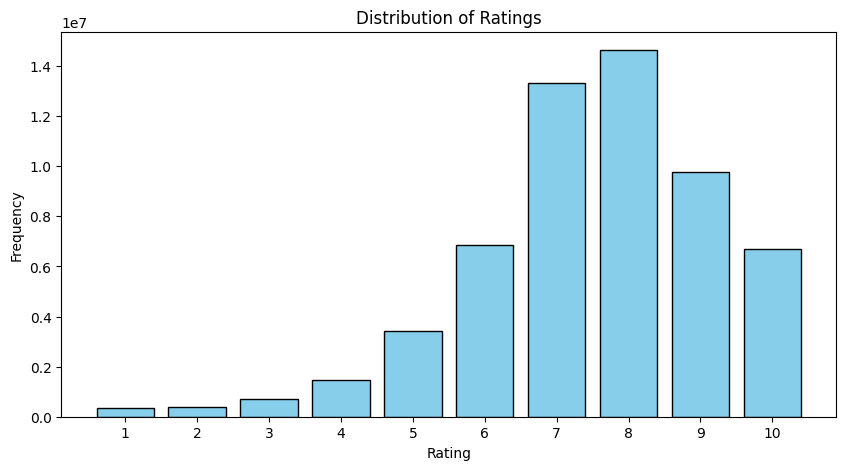

In [66]:
import matplotlib.pyplot as plt

# rating 데이터프레임의 rating 컬럼의 분포를 집계
rating_counts = rating['rating'].dropna().astype(int).value_counts().sort_index()

# 막대 그래프 그리기
plt.figure(figsize=(10, 5))
bars = plt.bar(rating_counts.index, rating_counts.values, 
               color='skyblue', edgecolor='black')

# 그래프 제목과 레이블 설정
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# X축의 눈금 레이블 설정 (1부터 10까지)
plt.xticks(range(1, 11))

# 그래프 출력
plt.show()

In [67]:
# 사용자가 평가한 애니메이션의 수
len(rating['anime_id'].unique())

16872

In [68]:
# 평점 정보는 모두 존재하는 상태 확인
print(len(rating[rating['rating']=='Unknown']))

0


In [69]:
user_four = rating[rating['user_id']==4]
user_four.head(3)

,user_id,anime_id,rating
504,4,7103,7
505,4,435,8
506,4,585,9


In [70]:
user_four['rating'].describe()

count    118.000000
mean       7.652542
std        1.179433
min        5.000000
25%        7.000000
50%        8.000000
75%        8.000000
max       10.000000
Name: rating, dtype: float64

In [71]:
rating['rating'].describe()

count    5.763328e+07
mean     7.510789e+00
std      1.697722e+00
min      1.000000e+00
25%      7.000000e+00
50%      8.000000e+00
75%      9.000000e+00
max      1.000000e+01
Name: rating, dtype: float64

In [72]:
import plotly.express as px
import pandas as pd

# 히스토그램 (막대 그래프) 그리기
fig = px.histogram(user_four['rating'], x='rating', nbins=8, 
                   title='Rating Distribution',
                   labels={'rating': 'Rating'},
                   color_discrete_sequence=['skyblue'])

# 그래프 레이아웃 설정
fig.update_layout(
    title_text='평점 분포',
    xaxis_title='평점',
    yaxis_title='빈도',
    xaxis=dict(
        tickfont=dict(size=22),  # X축 tick 숫자 크기 조절
        title_font=dict(size=22)  # X축 레이블 제목 크기 조절
    ),
    yaxis=dict(
        tickfont=dict(size=22),  # Y축 tick 숫자 크기 조절
        title_font=dict(size=22)  # Y축 레이블 제목 크기 조절
    ),
    bargap=0.1,  # 막대 간 간격 조절
    width=600,  # 전체 그래프 너비 설정
    height=400  # 전체 그래프 높이 설정
)

# 그래프 보여주기
fig.show()

In [73]:
synop = pd.read_csv("/kaggle/input/anime-recommendation-database-2020/anime_with_synopsis.csv")

In [74]:
merged_user_four = pd.merge(user_four, 
                            synop, 
                            left_on='anime_id', 
                            right_on='MAL_ID', 
                            how='left')
merged_user_four.head(2)

,user_id,anime_id,rating,MAL_ID,Name,Score,Genres,sypnopsis
0,4,7103,7,7103,Miracle☆Train: Oedo-sen e Youkoso,6.52,"Fantasy, Shoujo",other version of Miracle Train: Chuo-sen e You...
1,4,435,8,435,Magic Knight Rayearth,7.46,"Adventure, Comedy, Drama, Fantasy, Magic, Mech...","Hikaru Shidou, Umi Ryuuzaki, and Fuu Hououji a..."


In [75]:
merged_user_four.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    118 non-null    int64 
 1   anime_id   118 non-null    int64 
 2   rating     118 non-null    int64 
 3   MAL_ID     118 non-null    int64 
 4   Name       118 non-null    object
 5   Score      118 non-null    object
 6   Genres     118 non-null    object
 7   sypnopsis  118 non-null    object
dtypes: int64(4), object(4)
memory usage: 7.5+ KB


In [76]:
import plotly.express as px

# 장르 데이터 분리 및 빈도 계산
# 장르를 쉼표로 구분하여 리스트로 변환
genres_list = merged_user_four['Genres'].str.split(', ', expand=True).stack()

# 각 장르의 빈도 계산
genre_counts = genres_list.value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# 장르 분포 시각화
fig = px.bar(genre_counts, x='Genre', y='Count', 
             title='Genre Distribution',
             labels={'Genre': 'Genre', 'Count': 'Frequency'},
             color='Count',
             color_continuous_scale='Pinkyl')

# 그래프 레이아웃 설정
fig.update_layout(
    xaxis_title='Genre',
    yaxis_title='Frequency',
    xaxis_tickangle=-45
)

# 그래프 보여주기
fig.show()

In [77]:
len(genre_counts)

34

In [117]:
# 장르 분포 top 10만 다시 시각화
fig = px.bar(top10_genres, y='Genre', x='Count', 
             title='Genre Distribution',
             labels={'Genre': 'Genre', 'Count': 'Frequency'},
             color='Count',
             color_continuous_scale='Pinkyl')

fig.update_layout(
    xaxis_title='Frequency',
    yaxis_title='Genre',
    #xaxis_tickangle=-90,
    width=400,  
    height=600  
    
)

fig.show()

In [118]:
synop = pd.read_csv("/kaggle/input/anime-recommendation-database-2020/anime_with_synopsis.csv")

In [119]:
synop.head(2)

,MAL_ID,Name,Score,Genres,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."


In [120]:
synop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16214 entries, 0 to 16213
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MAL_ID     16214 non-null  int64 
 1   Name       16214 non-null  object
 2   Score      16214 non-null  object
 3   Genres     16214 non-null  object
 4   sypnopsis  16206 non-null  object
dtypes: int64(1), object(4)
memory usage: 633.5+ KB


In [121]:
print(len(synop[synop['Name']=='Unknown']))
print(len(synop[synop['Score']=='Unknown'])) # 결측치가 많음
print(len(synop[synop['Genres']=='Unknown']))
print(len(synop[synop['sypnopsis']=='Unknown']))

0
5123
63
0


In [122]:
# anime_id와 MAL_ID를 기준으로 병합
merged_df = pd.merge(rating, synop, 
                     left_on='anime_id', right_on='MAL_ID', 
                     how='left')
merged_df.head()

,user_id,anime_id,rating,MAL_ID,Name,Score,Genres,sypnopsis
0,0,430,9,430.0,Fullmetal Alchemist: The Conqueror of Shamballa,7.57,"Military, Comedy, Historical, Drama, Fantasy, ...","In desperation, Edward Elric sacrificed his bo..."
1,0,1004,5,1004.0,Kanojo to Kanojo no Neko,7.33,"Drama, Psychological, Romance, Slice of Life",It was on a rainy spring day that Chobi became...
2,0,3010,7,3010.0,Kaiketsu Zorro,7.23,"Adventure, Historical, Shounen",Diego Vega returns from his study trip to disc...
3,0,570,7,570.0,Jin-Rou,7.79,"Military, Police, Psychological, Drama, Romance","In an alternate history, following World War I..."
4,0,2762,9,2762.0,Igano Kabamaru,7.87,"Action, Adventure, Comedy, Romance, School, Sh...","fter the death of Saizou, Kabamaru's horribly ..."


In [123]:
anime = pd.read_csv("/kaggle/input/anime-recommendation-database-2020/anime.csv")

In [124]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

In [125]:
print(len(anime['MAL_ID'].unique()))

17562


In [126]:
anime.head(2)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0


In [127]:
# 사용자들이 관심 없는 애니메이션이 있는지

def count_zero_values(df):
    zero_counts = {}
    for column in df.columns:
        zero_count = (df[column] == 0).sum()
        if zero_count > 0:
            zero_counts[column] = zero_count
    return zero_counts


zero_counts = count_zero_values(anime)
print(zero_counts)

{'Popularity': 2, 'Favorites': 5682, 'Watching': 357, 'Completed': 531, 'On-Hold': 871, 'Dropped': 376}


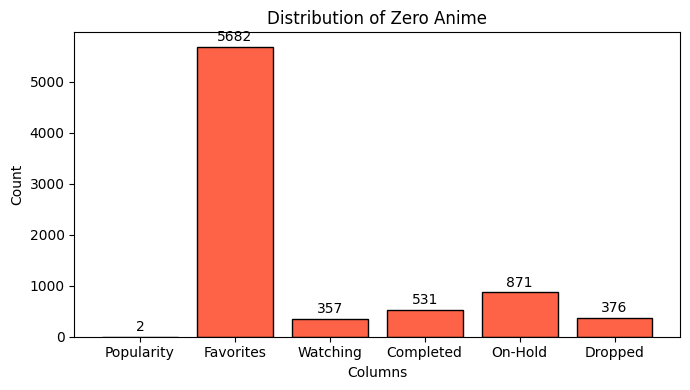

In [128]:
# 사람들이 관심을 주지 않는 애니메이션의 수

# 데이터 정렬 (막대의 높이를 기준으로 내림차순 정렬)
labels = list(zero_counts.keys())
values = list(zero_counts.values())

# 막대 그래프 그리기
plt.figure(figsize=(7, 4))
plt.bar(labels, values, color='tomato', edgecolor='black')

# 그래프 제목과 레이블 설정
plt.title('Distribution of Zero Anime')
plt.xlabel('Columns')
plt.ylabel('Count')

# 막대 위에 값 표시
for i, value in enumerate(values):
    plt.text(i, value + 50, str(value), ha='center', va='bottom')

# 그래프 레이아웃 조정
plt.tight_layout()
plt.show()

In [129]:
# 사용자들이 보다가 시청을 포기한 비율이 매우 높다

dropped = anime[anime['Dropped']>0] 
len(dropped)

17186

In [130]:
# 시청을 포기한 경우에 한정해서 기술통계량 확인
dropped['Dropped'].describe()

count     17186.000000
mean       1202.341499
std        4788.695660
min           1.000000
25%          38.000000
50%          80.000000
75%         281.750000
max      174710.000000
Name: Dropped, dtype: float64

In [131]:
anime.columns

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')

In [132]:
# 평균 점수만 사용할 예정
anime = anime.drop(['Score-10', 'Score-9', 'Score-8', 
                    'Score-7', 'Score-6',
                    'Score-5', 'Score-4', 'Score-3', 
                    'Score-2', 'Score-1'], axis=1)

In [133]:
# unknown으로 입력된 데이터들이 많은 듯

def count_unknown_values(df):
    unknown_counts = {}
    for column in df.columns:
        unknown_count = (df[column] == 'Unknown').sum()
        if unknown_count > 0:
            unknown_counts[column] = unknown_count
    return unknown_counts


unknown_counts = count_unknown_values(anime)
print(unknown_counts)

{'Score': 5141, 'Genres': 63, 'English name': 10565, 'Japanese name': 48, 'Type': 37, 'Episodes': 516, 'Aired': 309, 'Premiered': 12817, 'Producers': 7794, 'Licensors': 13616, 'Studios': 7079, 'Source': 3567, 'Duration': 555, 'Rating': 688, 'Ranked': 1762}


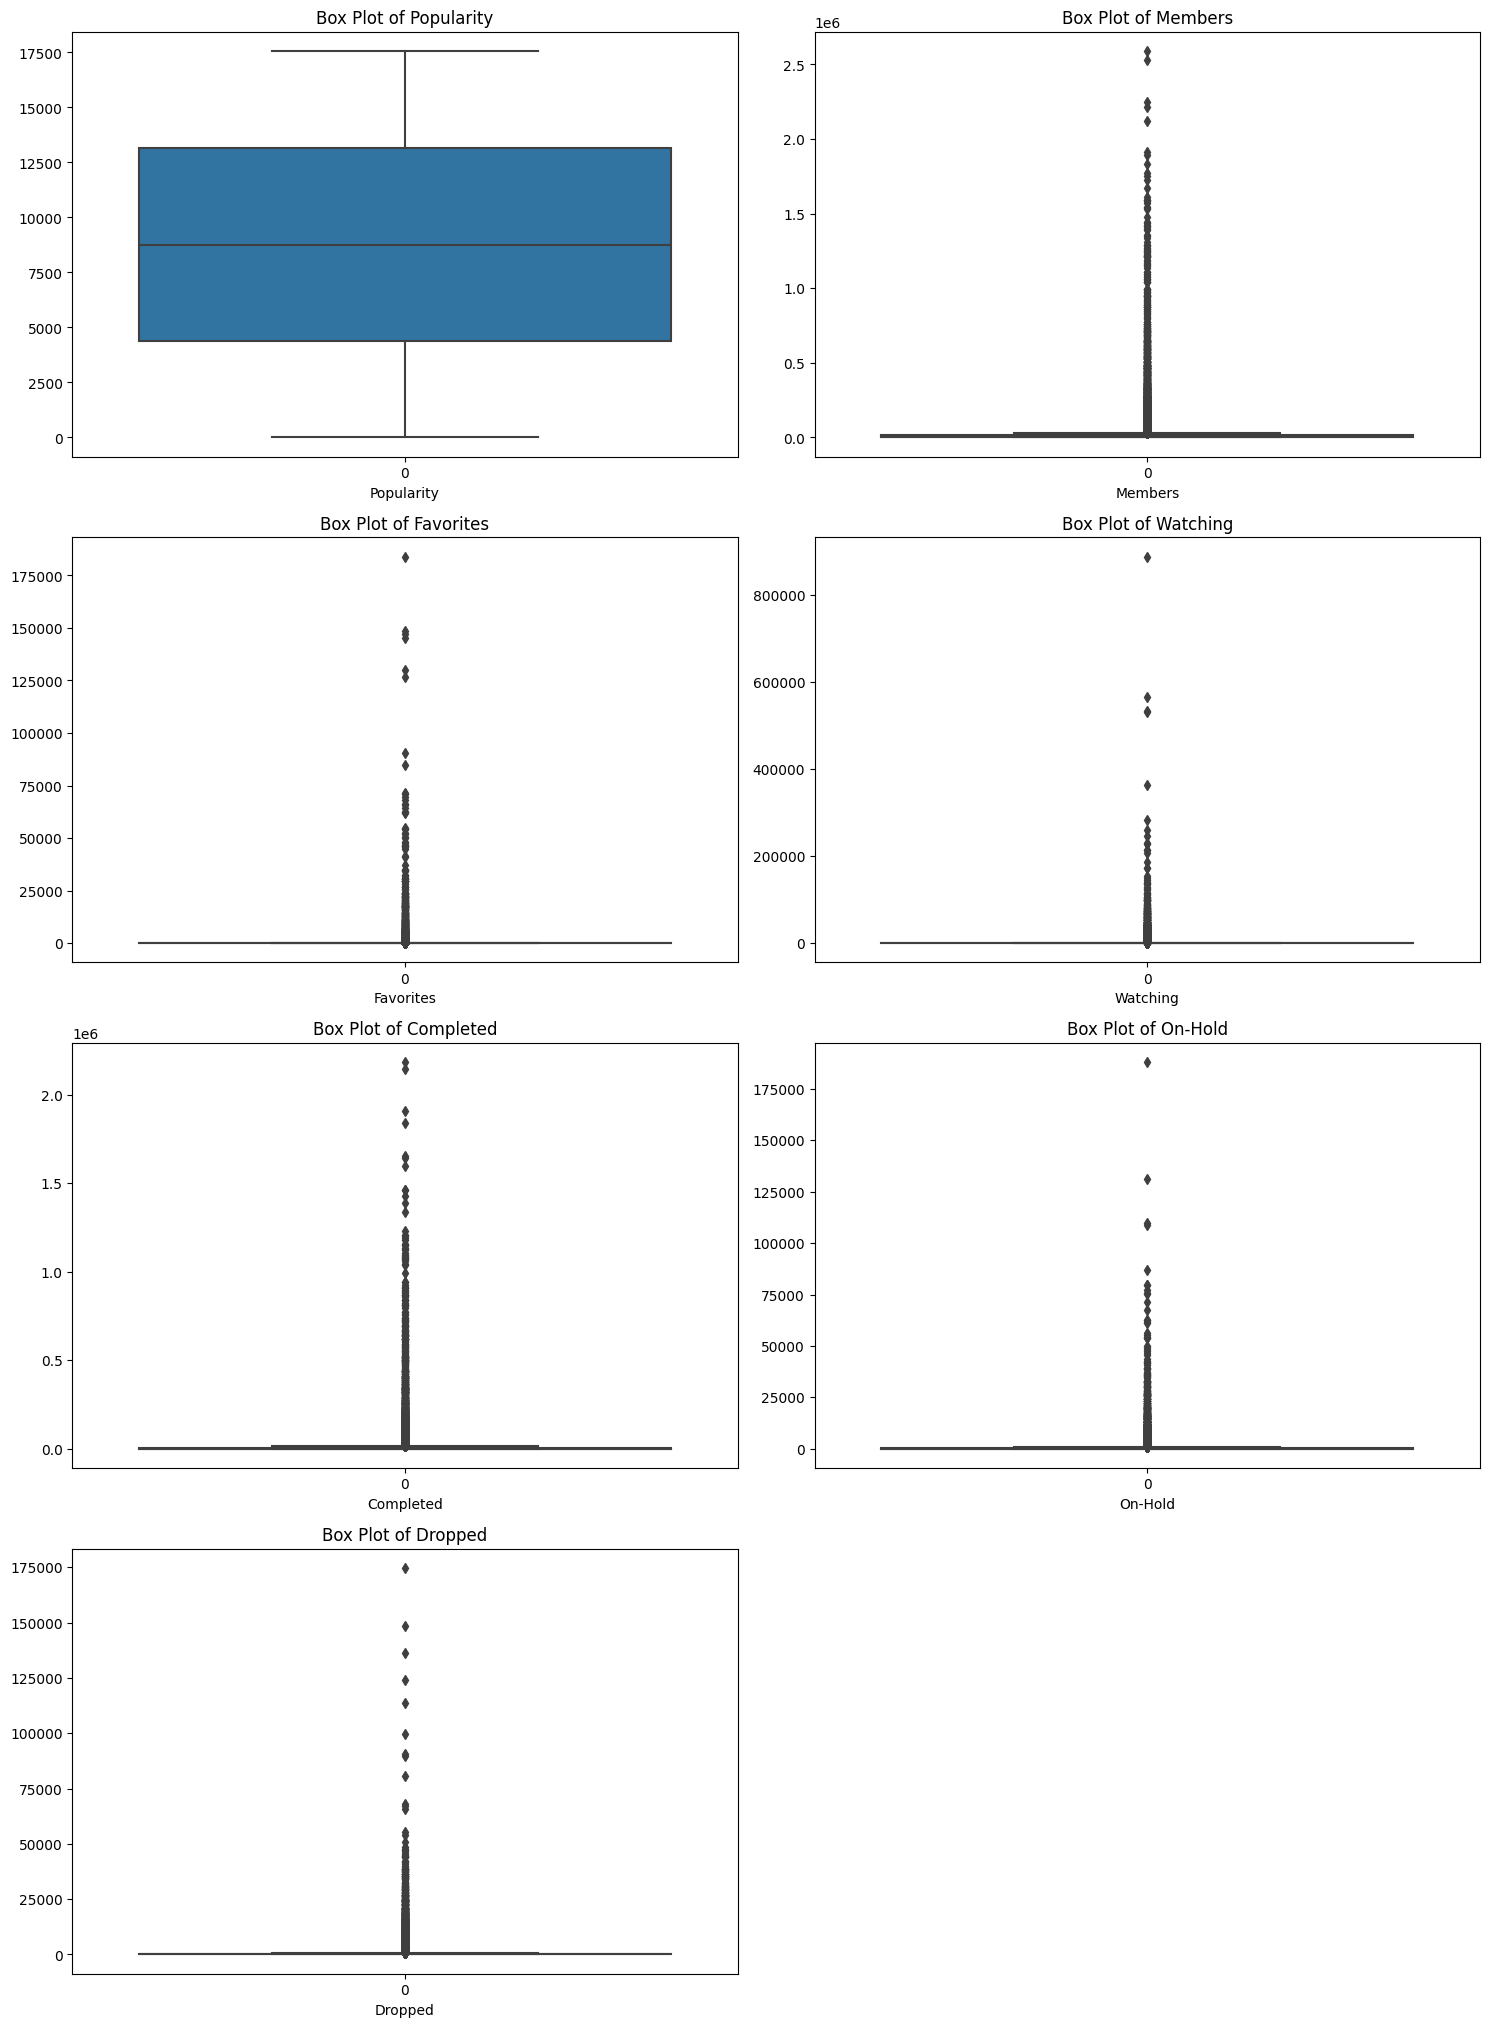

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

# 각 컬럼 박스 플롯으로 확인
columns_to_check = ['Popularity', 'Members', 'Favorites', 
                    'Watching', 'Completed', 'On-Hold', 'Dropped']

plt.figure(figsize=(15, 25))

for i, column in enumerate(columns_to_check, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(data=anime[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

## 사용자의 부정적 경험이 발생할 수 있는 부분 파악

In [135]:
df = anime[['Popularity', 'Members', 'Favorites', 
             'Watching', 'Completed', 'On-Hold', 'Dropped']]
print(len(df))

17562


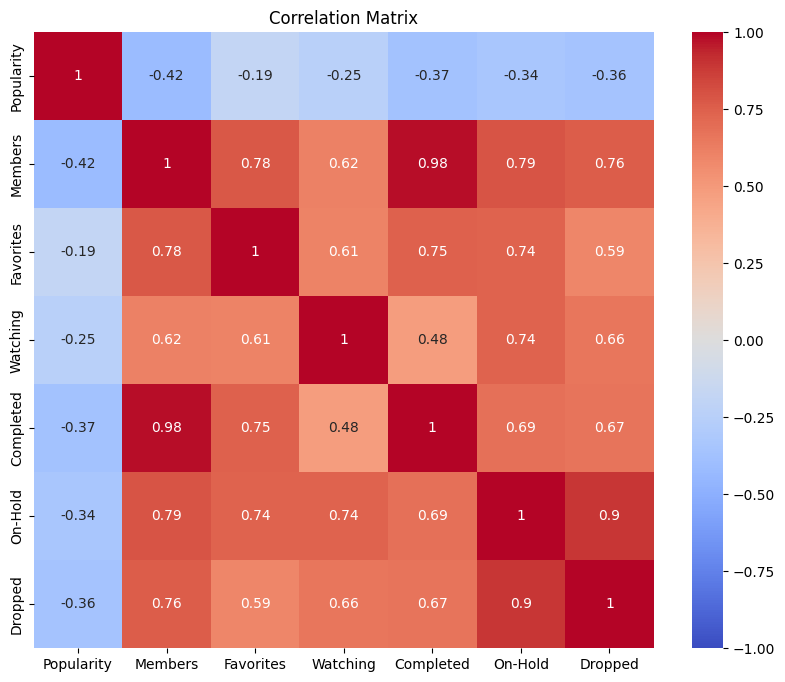

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관계수
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, 
            cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

- 시청 보류가 시청 중단으로 이어질 수 있는 상태

In [137]:
# 결측치(Unknown)가 많은 평점 컬럼과도 비교
df2 = anime[['Score', 'Popularity', 'Members', 'Favorites', 
             'Watching', 'Completed', 'On-Hold', 'Dropped']]
df2 = df2.dropna()

In [138]:
# Score가 'Unknown'이 아닌 행 선택
df2 = df2[df2['Score'] != 'Unknown']
print(len(df2))

12421


In [139]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12421 entries, 0 to 17552
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Score       12421 non-null  object
 1   Popularity  12421 non-null  int64 
 2   Members     12421 non-null  int64 
 3   Favorites   12421 non-null  int64 
 4   Watching    12421 non-null  int64 
 5   Completed   12421 non-null  int64 
 6   On-Hold     12421 non-null  int64 
 7   Dropped     12421 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 873.4+ KB


In [140]:
df2['Score'] = pd.to_numeric(df2['Score'], errors='coerce')

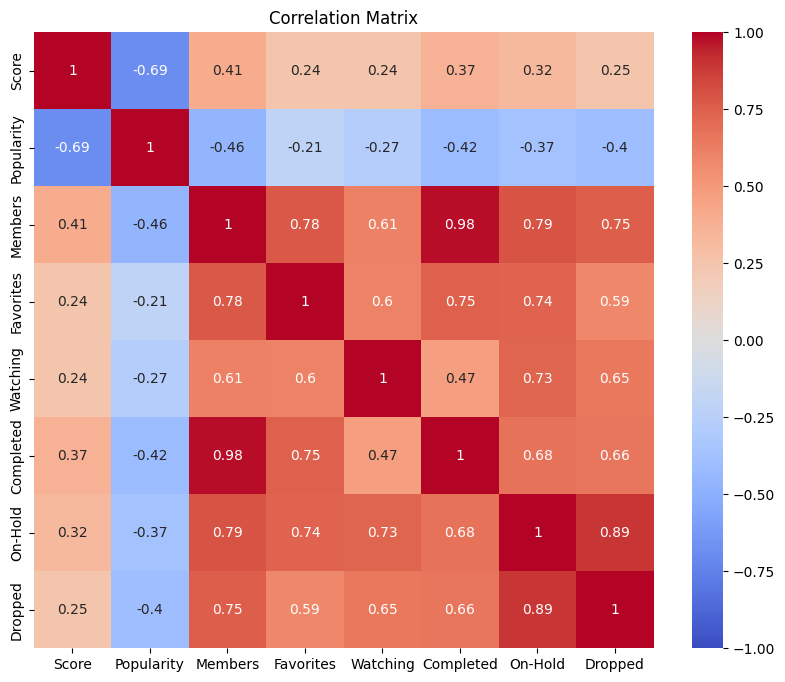

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관계수
correlation_matrix = df2.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, 
            cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [142]:
import plotly.graph_objs as go
import plotly.figure_factory as ff

# 상관계수 계산
correlation_matrix = df2.corr()

# 히트맵 생성
fig = ff.create_annotated_heatmap(
    z=correlation_matrix.values,
    x=list(correlation_matrix.columns),
    y=list(correlation_matrix.index),
    annotation_text=correlation_matrix.round(2).values,
    colorscale='RdBu',  # 색상 스케일, 'coolwarm'에 대응
    zmin=-1, zmax=1
)

# 레이아웃 설정
fig.update_layout(
    title={
        'text': 'Correlation Matrix',
        'font': {'size': 22}
    },
    xaxis_title={
        'text': 'Variables',
        'font': {'size': 20}
    },
    yaxis_title={
        'text': 'Variables',
        'font': {'size': 20}
    },
    width=800, height=700,
    xaxis_nticks=36
)

# 그래프 출력
fig.show()

In [143]:
import plotly.graph_objs as go
import plotly.figure_factory as ff

df3 = df2[['Score', 'Members', 'Popularity', 'On-Hold', 'Completed', 'Dropped']]
df3.columns = ['평점', '멤버 수', '인기도', '시청 보류', '시청 완료', '시청 포기']

# 상관계수 계산
correlation_matrix = df3.corr()

# 히트맵 생성
fig = ff.create_annotated_heatmap(
    z=correlation_matrix.values,
    x=list(correlation_matrix.columns),
    y=list(correlation_matrix.index),
    annotation_text=correlation_matrix.round(2).values,
    colorscale='RdBu',  # 색상 스케일, 'coolwarm'에 대응
    zmin=-1, zmax=1
)

# 각 셀에 대한 폰트 설정
annotations = [
    dict(
        text=correlation_matrix.round(2).values[i, j],
        x=list(correlation_matrix.columns)[j],
        y=list(correlation_matrix.index)[i],
        font=dict(size=18),  # 상관계수 수치의 폰트 크기 설정
        showarrow=False
    )
    for i in range(len(correlation_matrix.index))
    for j in range(len(correlation_matrix.columns))
]

# 레이아웃 설정
fig.update_layout(
    title={
        'text': 'Correlation Matrix',
        'font': {'size': 22}
    },
    xaxis=dict(
        tickfont=dict(size=16)  # x축 라벨 글씨 크기 조정
    ),
    yaxis=dict(
        tickfont=dict(size=16)  # y축 라벨 글씨 크기 조정
    ),
    annotations=annotations,  # 폰트 설정 적용
    width=700, height=600
)

# 그래프 출력
fig.show()

In [144]:
from scipy.stats import pearsonr

# 상관관계 및 p-value 계산
corr_score_members, p_value_members = pearsonr(df2['Members'], df2['Completed'])
corr_score_members2, p_value_members2 = pearsonr(df2['Members'], df2['On-Hold'])
corr_score_members3, p_value_members3 = pearsonr(df2['Members'], df2['Dropped'])
corr_score_popularity, p_value_popularity = pearsonr(df2['Score'], df2['Popularity'])
corr_on_hold_dropped, p_value_on_hold_dropped = pearsonr(df2['On-Hold'], df2['Dropped'])


print(f"Members vs Completed: Correlation = {corr_score_members}, p-value = {p_value_members}")
print(f"Members vs On-Hold: Correlation = {corr_score_members2}, p-value = {p_value_members2}")
print(f"Members vs Dropped: Correlation = {corr_score_members3}, p-value = {p_value_members3}")
print(f"Score vs Popularity: Correlation = {corr_score_popularity}, p-value = {p_value_popularity}")
print(f"On-Hold vs Dropped: Correlation = {corr_on_hold_dropped}, p-value = {p_value_on_hold_dropped}")

Members vs Completed: Correlation = 0.9767635944229982, p-value = 0.0
Members vs On-Hold: Correlation = 0.7893624559467028, p-value = 0.0
Members vs Dropped: Correlation = 0.7525204234736936, p-value = 0.0
Score vs Popularity: Correlation = -0.6945356635919305, p-value = 0.0
On-Hold vs Dropped: Correlation = 0.8941482076583575, p-value = 0.0


In [145]:
df2['Members'].describe()

count    1.242100e+04
mean     4.853445e+04
std      1.466657e+05
min      1.720000e+02
25%      1.489000e+03
50%      5.279000e+03
75%      2.718800e+04
max      2.589552e+06
Name: Members, dtype: float64

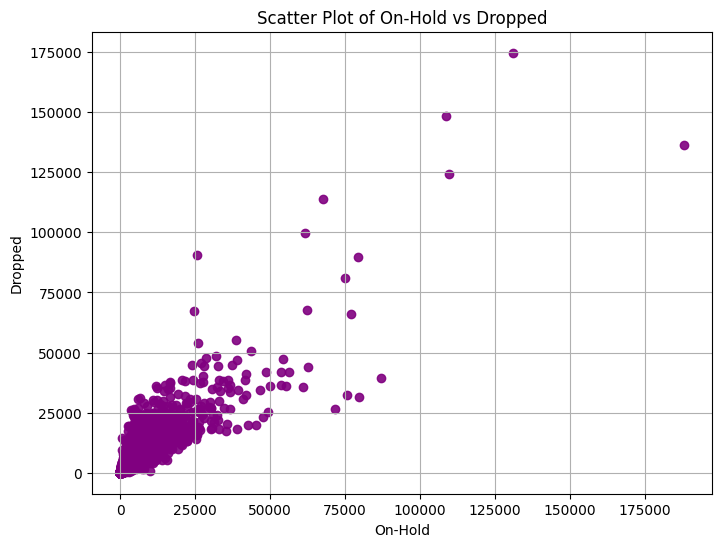

In [146]:
plt.figure(figsize=(8, 6))
plt.scatter(df['On-Hold'], df['Dropped'], color='purple', 
            alpha=0.9)
plt.title('Scatter Plot of On-Hold vs Dropped')
plt.xlabel('On-Hold')
plt.ylabel('Dropped')
plt.grid(True)
plt.show()

In [147]:
# 이상치들이 약간 존재하므로 제외하고 다시 확인

# On-Hold < 50000 및 Dropped < 50000인 데이터 필터링
filtered_df = df[(df['On-Hold'] < 50000) & (df['Dropped'] < 50000)]

# 상관관계 계산
correlation = filtered_df.corr().loc['On-Hold', 'Dropped']
print(f'상관관계: {correlation:.2f}')

상관관계: 0.89


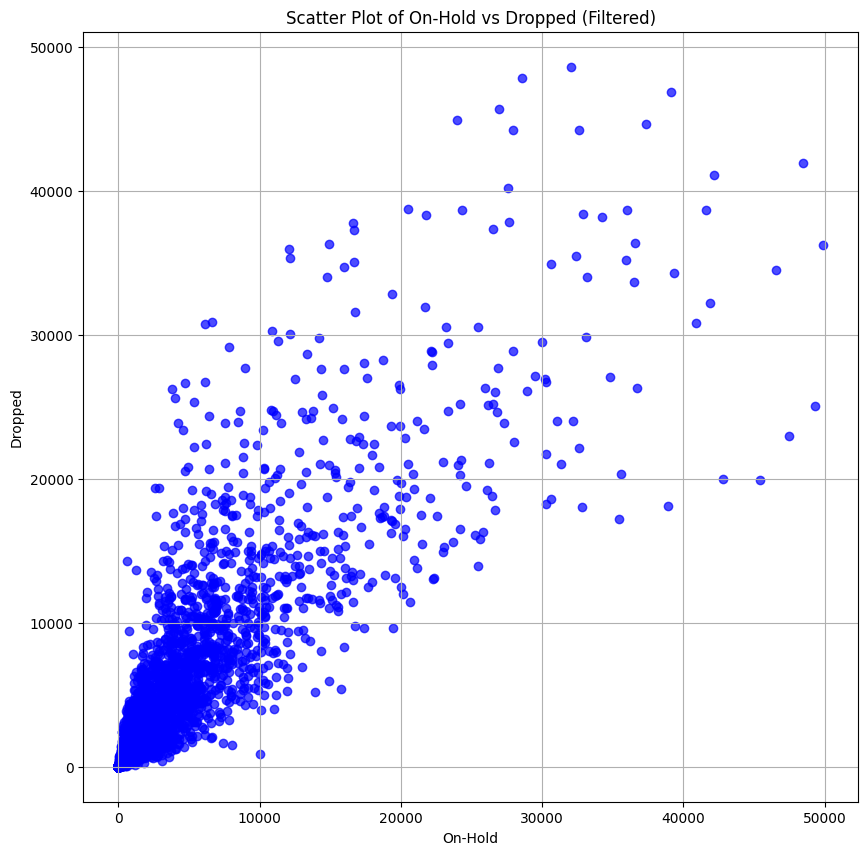

In [148]:
# 산점도
plt.figure(figsize=(10, 10))
plt.scatter(filtered_df['On-Hold'], filtered_df['Dropped'], color='blue', alpha=0.7)
plt.title('Scatter Plot of On-Hold vs Dropped (Filtered)')
plt.xlabel('On-Hold')
plt.ylabel('Dropped')
plt.grid(True)
plt.show()

In [149]:
import plotly.graph_objs as go
import plotly.express as px

# Plotly를 사용한 산점도
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=filtered_df['On-Hold'],
    y=filtered_df['Dropped'],
    mode='markers',
    marker=dict(color='blue', size=8, opacity=0.7),
    text=filtered_df.index,
    name='On-Hold vs Dropped'
))

# 레이아웃 설정 (글씨 크기 조절 포함)
fig.update_layout(
    title={
        'text': '시청 보류 사용자 수 vs 시청 포기 사용자 수 산점도(Filtered)',
        'font': {'size': 22}  # 제목의 글씨 크기
    },
    xaxis_title={
        'text': '시청 보류 사용자 수',
        'font': {'size': 18}  # x축 레이블의 글씨 크기
    },
    yaxis_title={
        'text': '시청 포기 사용자 수',
        'font': {'size': 18}  # y축 레이블의 글씨 크기
    },
    xaxis=dict(
        tickfont=dict(size=17)  # x축 tick 라벨의 글씨 크기
    ),
    yaxis=dict(
        tickfont=dict(size=17)  # y축 tick 라벨의 글씨 크기
    ),
    template='plotly_white',
    showlegend=False,
    width=700,  # 너비 조절
    height=700  # 높이 조절
)

# 그래프 출력
fig.show()

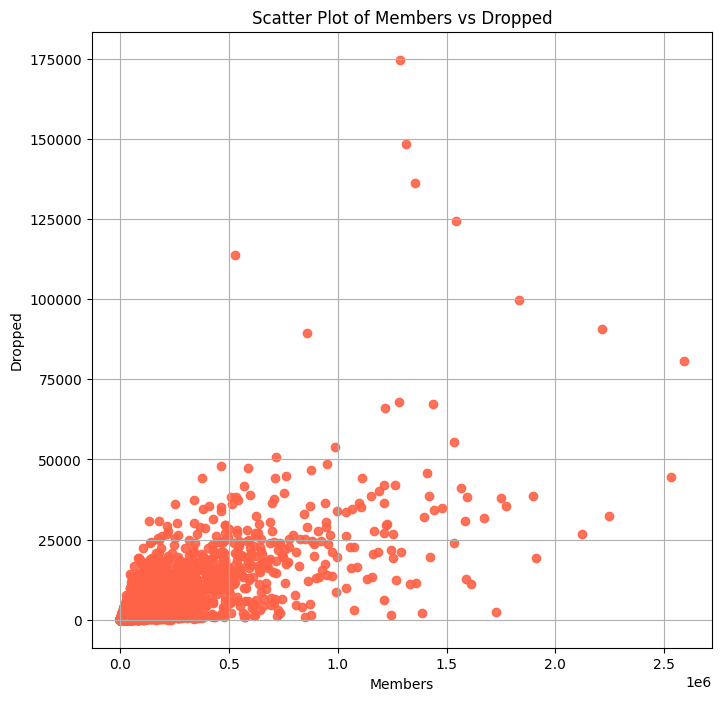

In [150]:
plt.figure(figsize=(8, 8))
plt.scatter(df['Members'], df['Dropped'], color='tomato', 
            alpha=0.9)
plt.title('Scatter Plot of Members vs Dropped')
plt.xlabel('Members')
plt.ylabel('Dropped')
plt.grid(True)
plt.show()

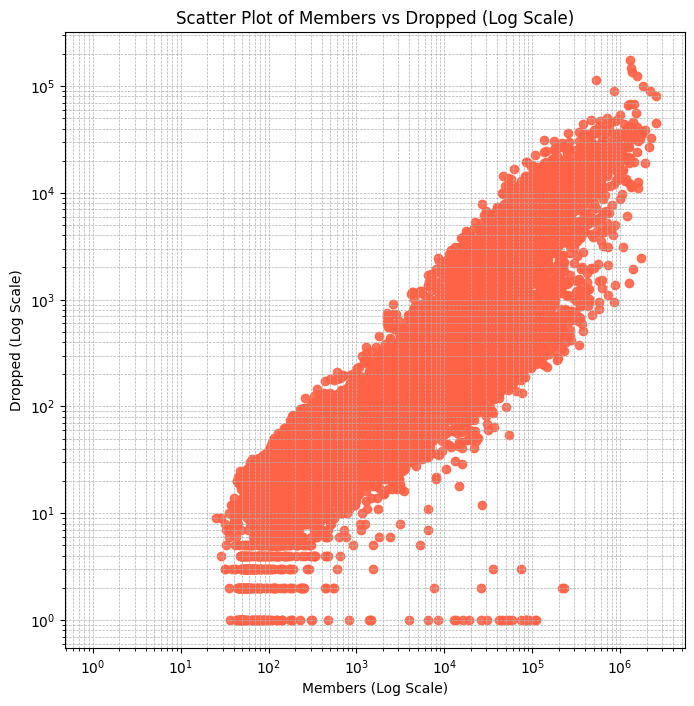

In [151]:
# 로그 스케일로 변환
plt.figure(figsize=(8, 8))
plt.scatter(df['Members'], df['Dropped'], color='tomato', 
            alpha=0.9)
plt.xscale('log')
plt.yscale('log')
plt.title('Scatter Plot of Members vs Dropped (Log Scale)')
plt.xlabel('Members (Log Scale)')
plt.ylabel('Dropped (Log Scale)')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

In [152]:
# 산점도 생성
fig = go.Figure()

# 데이터 추가
fig.add_trace(go.Scatter(
    x=df['Members'],
    y=df['Dropped'],
    mode='markers',
    marker=dict(color='tomato', size=10, opacity=0.9),
    name='Members vs Dropped'
))

# 레이아웃 설정 (글씨 크기 조절 포함)
fig.update_layout(
    title={
        'text': '커뮤니티 멤버 수 vs 시청 포기 사용자 수 산점도(Log scale)',
        'font': {'size': 22}  # 제목의 글씨 크기
    },
    xaxis_title={
        'text': '커뮤니티 멤버 수(Log scale)',
        'font': {'size': 18}  # x축 레이블의 글씨 크기
    },
    yaxis_title={
        'text': '시청 포기 사용자 수(Log scale)',
        'font': {'size': 18}  # y축 레이블의 글씨 크기
    },
    xaxis=dict(
        tickfont=dict(size=17),  # x축 tick 라벨의 글씨 크기
        type='log'  # x축 로그 스케일
    ),
    yaxis=dict(
        tickfont=dict(size=17),  # y축 tick 라벨의 글씨 크기
        type='log'  # y축 로그 스케일
    ),
    template='plotly_white',
    showlegend=False,
    width=700,  # 너비 조절
    height=700  # 높이 조절
)

# 그래프 출력
fig.show()

In [153]:
import plotly.graph_objs as go
import plotly.express as px

# Plotly를 사용한 산점도
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df2['Members'],
    y=df2['Score'],
    mode='markers',
    marker=dict(color='blue', size=8, opacity=0.7),
    text=df2.index,
    name='Members vs Score'
))

# 레이아웃 설정 (글씨 크기 조절 포함)
fig.update_layout(
    title={
        'text': 'Members vs Score 산점도(Filtered)',
        'font': {'size': 22}  # 제목의 글씨 크기
    },
    xaxis_title={
        'text': 'Members',
        'font': {'size': 18}  # x축 레이블의 글씨 크기
    },
    yaxis_title={
        'text': 'Score',
        'font': {'size': 18}  # y축 레이블의 글씨 크기
    },
    xaxis=dict(
        tickfont=dict(size=17)  # x축 tick 라벨의 글씨 크기
    ),
    yaxis=dict(
        tickfont=dict(size=17)  # y축 tick 라벨의 글씨 크기
    ),
    template='plotly_white',
    showlegend=False,
    width=700,  # 너비 조절
    height=700  # 높이 조절
)

# 그래프 출력
fig.show()

In [154]:
import plotly.graph_objs as go
import plotly.express as px

# Plotly를 사용한 산점도
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df2['Popularity'],
    y=df2['Score'],
    mode='markers',
    marker=dict(color='yellowgreen', size=5, opacity=0.7),
    text=df2.index,
    name='Popularity vs Score'
))

# 레이아웃 설정 (글씨 크기 조절 포함)
fig.update_layout(
    title={
        'text': 'Popularity vs Score 산점도(Filtered)',
        'font': {'size': 22}  # 제목의 글씨 크기
    },
    xaxis_title={
        'text': 'Popularity',
        'font': {'size': 18}  # x축 레이블의 글씨 크기
    },
    yaxis_title={
        'text': 'Score',
        'font': {'size': 18}  # y축 레이블의 글씨 크기
    },
    xaxis=dict(
        tickfont=dict(size=17)  # x축 tick 라벨의 글씨 크기
    ),
    yaxis=dict(
        tickfont=dict(size=17)  # y축 tick 라벨의 글씨 크기
    ),
    template='plotly_white',
    showlegend=False,
    width=600,  # 너비 조절
    height=600  # 높이 조절
)

# 그래프 출력
fig.show()